# Visualization of the models

In [1]:
%pylab inline
import torch
from torchvision import datasets, transforms
from torch.autograd import Variable
from torch import nn, optim
from VAE import *
from train import *
import numpy as np
from collections import *
import random
from sklearn.manifold import TSNE 
import pickle
import os
import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
def load_data():
    train_data = datasets.MNIST('../data', train=True, download=True, transform=transforms.ToTensor())
    train_loader_scatter_plot = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=False, **{})
    train_loader_tsne = torch.utils.data.DataLoader(train_data, batch_size=10000, shuffle=False, **{})  
    return train_loader_scatter_plot, train_loader_tsne

def find_latent_coordinates(train_loader_scatter_plot, model):
   
    x_coordinates = defaultdict(lambda: [])
    y_coordinates = defaultdict(lambda: [])
   
    for batch_idx, (data, label) in enumerate(train_loader_scatter_plot):
        model = model.cpu()
        _, z, _ = model(data)
        index = label.data.cpu().numpy()[0]
       
        x_coordinates[index].append(z.data.cpu().numpy()[0][0])
        y_coordinates[index].append(z.data.cpu().numpy()[0][1])
       
        if batch_idx == 10000:
            break
           
    return x_coordinates, y_coordinates

def find_TSNE_coordinates(train_loader_scatter_plot, model):
   
    x_coordinates = defaultdict(lambda: [])
    y_coordinates = defaultdict(lambda: [])
   
    for batch_idx, (data, label) in enumerate(train_loader_scatter_plot):
        model = model.cpu()
        _, z, _ = model(data)
            
        labels = label.data.numpy()
        embedded = TSNE(n_components=2).fit_transform(z.data.cpu().numpy())
        if batch_idx == 0:
            break
           
    assert embedded.shape[0] == labels.shape[0]   
    for i in range(embedded.shape[0]):
        x_coordinates[labels[i]].append(embedded[i][0])
        y_coordinates[labels[i]].append(embedded[i][1])
       
    return x_coordinates, y_coordinates

def plot_loss(losses, labels):
    epoch_space = np.linspace(1,200,200)
    for i in range(len(losses)):
        plt.plot(epoch_space, losses[i], label=labels[i])
    plt.legend()
    plt.show()
   
def plot_grid(VAE):
    N = 15
    if VAE.method == 'Gaussian':
        M1, M2 = -10, 10
    elif VAE.method == 'Gumbel':
        M1, M2 = -100, -0.01
    else:
        M1, M2 = 0.001, 0.999
    rows = np.linspace(M1, M2, N)
    cols = np.linspace(M1, M2, N)
    for i in range (N):
        for j in range(N):
            z = torch.FloatTensor([[rows[i],cols[j]]])
            try:
                x = VAE.decode(z)
            except RuntimeError:
                x = VAE.decode(z.cuda()).cpu()
            plt.subplot(N,N,i*N+j+1)
            plt.axis('off')
            plt.imshow(x.data.numpy().reshape(28,28))
    plt.show()

def visualize_models(paths):
    train_loader_scatter_plot, train_loader_tsne = load_data()
    losses = []
    labels = []
    for path in paths:
        outputs = pickle.load( open( path, "rb" ) )
        print("Model type: {}, latent dimension: {} ".format(outputs[0].method, outputs[0].latent_dim))
        if outputs[0].method == 'logit':
            print("Variance = {}".format(path.split("_")[1][:-2]))
        if outputs[0].latent_dim == 2:
            plot_grid(outputs[0])
            x, y = find_latent_coordinates(train_loader_scatter_plot, outputs[0])
        else:
            x, y = find_TSNE_coordinates(train_loader_tsne, outputs[0])
        for label in x:
            plt.scatter(x[label], y[label], marker='.')
        plt.axis('off')
        plt.show()
        losses.append(outputs[4])
        label = outputs[0].method + ' ' + str(outputs[0].latent_dim)
        labels.append(label)
    plot_loss(losses, labels)

In [3]:
files = glob.iglob('models/**/*.p', recursive=True)
files = [file for file in files]

Model type: logit, latent dimension: 2 
Variance = 178


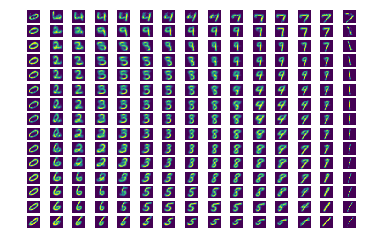

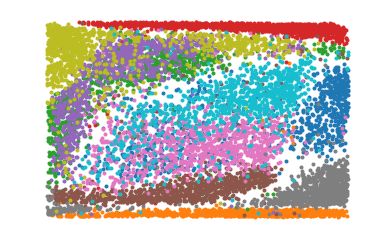

Model type: logit, latent dimension: 20 
Variance = 1


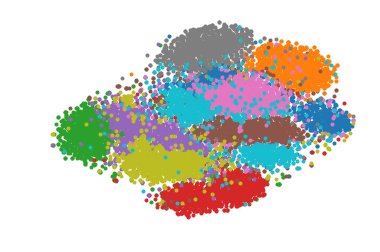

Model type: logit, latent dimension: 2 
Variance = 32


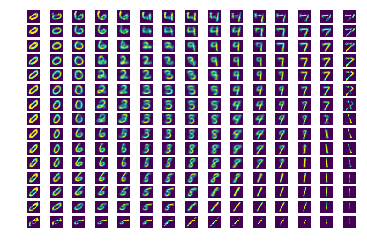

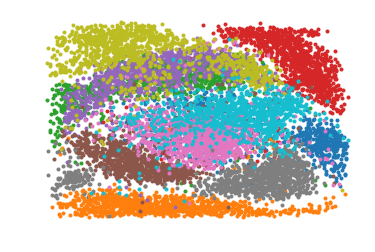

Model type: logit, latent dimension: 8 
Variance = 178


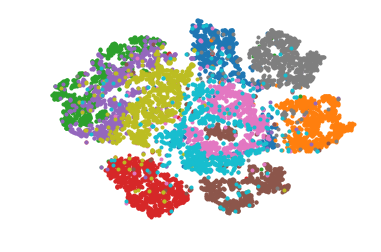

Model type: logit, latent dimension: 8 
Variance = 32


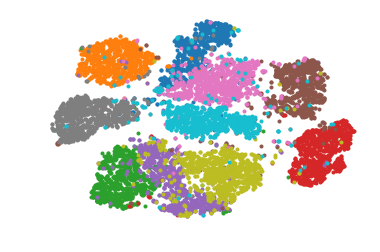

Model type: logit, latent dimension: 4 
Variance = 1


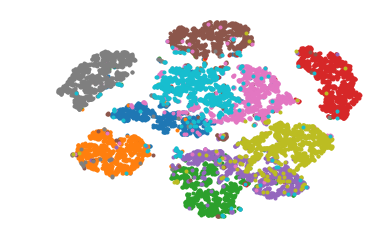

Model type: logit, latent dimension: 8 
Variance = 1


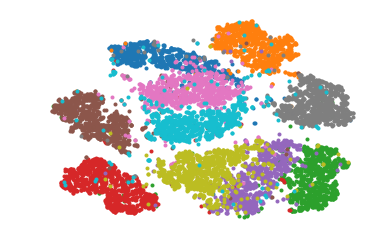

Model type: logit, latent dimension: 2 
Variance = 56


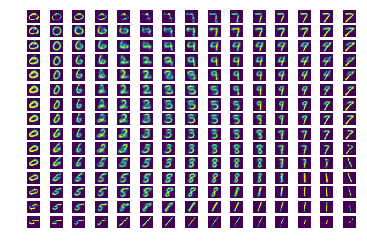

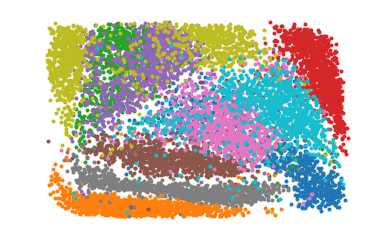

Model type: logit, latent dimension: 40 
Variance = 1


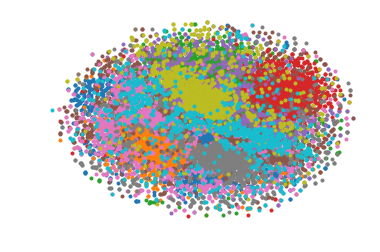

Model type: logit, latent dimension: 20 
Variance = 178


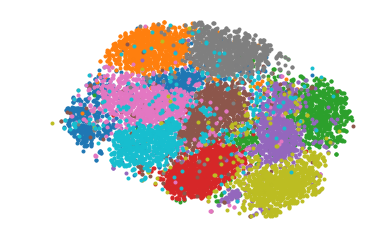

Model type: logit, latent dimension: 40 
Variance = 178


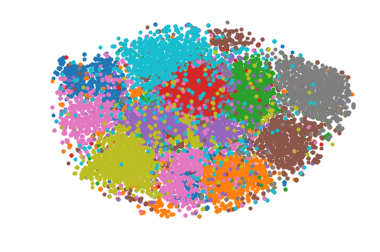

Model type: logit, latent dimension: 2 
Variance = 1


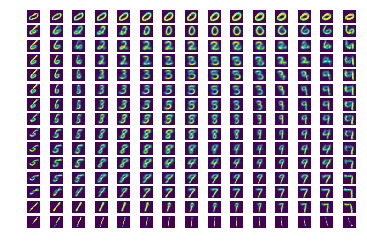

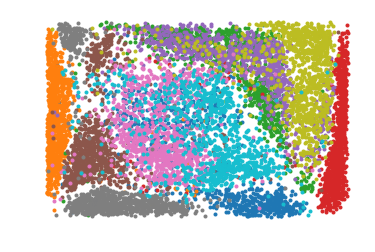

Model type: logit, latent dimension: 40 
Variance = 56


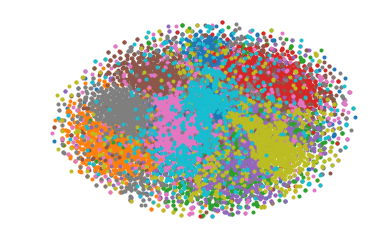

Model type: logit, latent dimension: 4 
Variance = 178


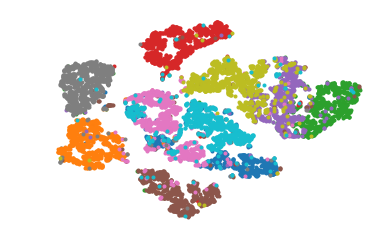

Model type: logit, latent dimension: 4 
Variance = 32


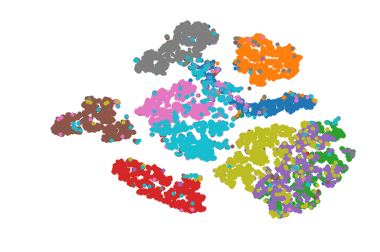

Model type: logit, latent dimension: 8 
Variance = 56


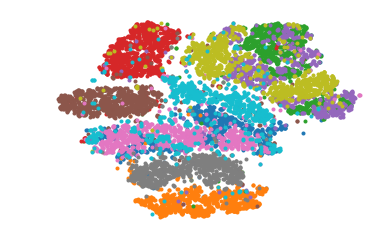

Model type: logit, latent dimension: 20 
Variance = 32


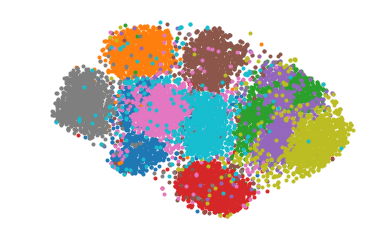

Model type: logit, latent dimension: 20 
Variance = 56


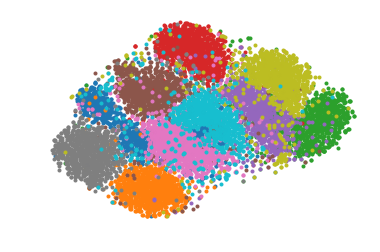

Model type: logit, latent dimension: 40 
Variance = 32


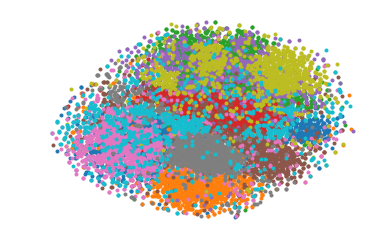

Model type: logit, latent dimension: 4 
Variance = 56


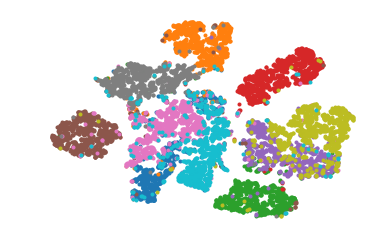

Model type: Gaussian, latent dimension: 2 


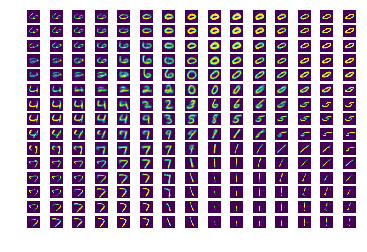

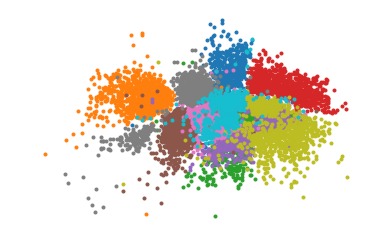

Model type: Gaussian, latent dimension: 8 


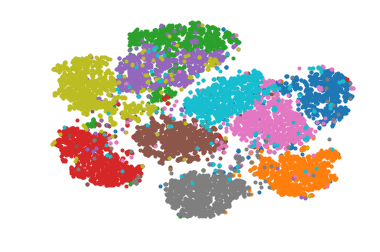

Model type: Gaussian, latent dimension: 40 


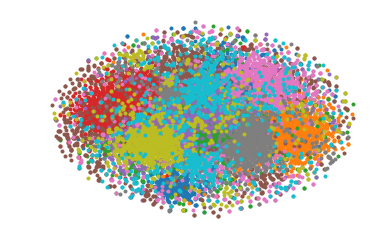

Model type: Gaussian, latent dimension: 4 


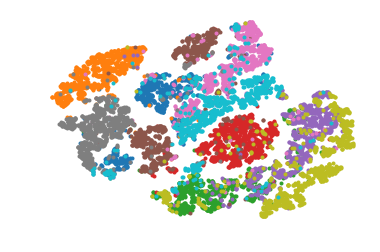

Model type: Gaussian, latent dimension: 20 


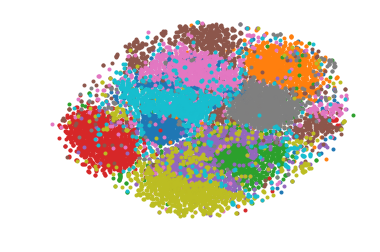

Model type: Gumbel, latent dimension: 4 


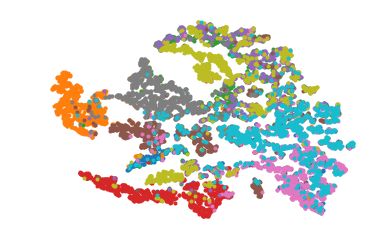

Model type: Gumbel, latent dimension: 8 


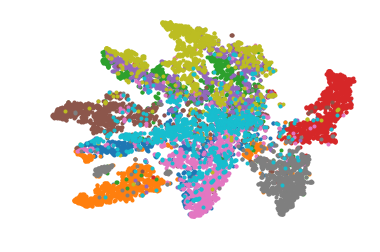

Model type: Gumbel, latent dimension: 2 


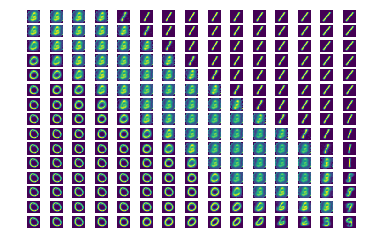

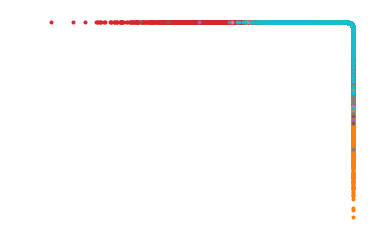

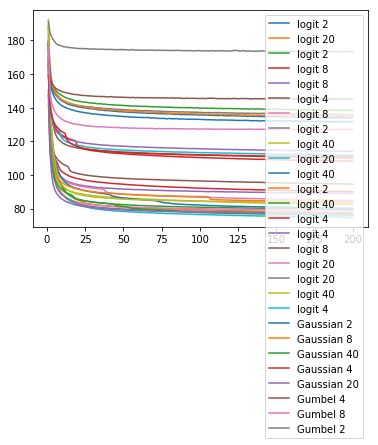

In [4]:
visualize_models(files)

In [9]:
train_loader_scatter_plot, train_loader_tsne = load_data()
for file in files:
    outputs = pickle.load( open( file, "rb" ) )
    print("Model type: {}, latent dimension: {} ".format(outputs[0].method, outputs[0].latent_dim))
    if outputs[0].method == 'logit':
        print("Variance = {}".format(file.split("_")[1][:-2]))
    print("    Last ELBO: {}".format(outputs[1][-1]))

Model type: logit, latent dimension: 2 
Variance = 178
    Last ELBO: 140.2128432337443
Model type: logit, latent dimension: 20 
Variance = 1
    Last ELBO: 97.61741974512736
Model type: logit, latent dimension: 2 
Variance = 32
    Last ELBO: 145.42306518554688
Model type: logit, latent dimension: 8 
Variance = 178
    Last ELBO: 105.56507168451945
Model type: logit, latent dimension: 8 
Variance = 32
    Last ELBO: 105.023128490448
Model type: logit, latent dimension: 4 
Variance = 1
    Last ELBO: 120.1031064414978
Model type: logit, latent dimension: 8 
Variance = 1
    Last ELBO: 101.61267997741699
Model type: logit, latent dimension: 2 
Variance = 56
    Last ELBO: 142.67316679000854
Model type: logit, latent dimension: 40 
Variance = 1
    Last ELBO: 100.45458904902141
Model type: logit, latent dimension: 20 
Variance = 178
    Last ELBO: 96.96692744572957
Model type: logit, latent dimension: 40 
Variance = 178
    Last ELBO: 104.02170490264892
Model type: logit, latent dimensio

Model type: Gumbel, latent dimension: 20 


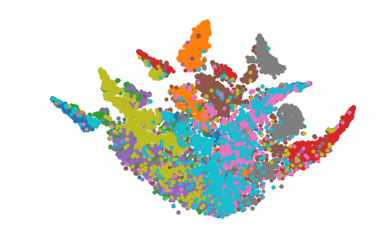

Model type: Gumbel, latent dimension: 40 


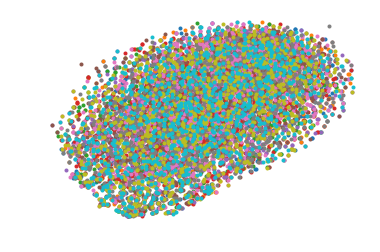

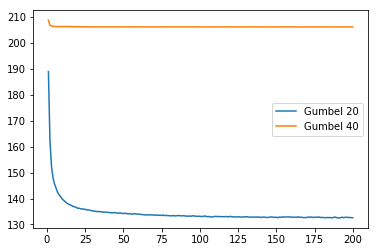

In [11]:
files = ['models/gumbel/gumbel20.p', 'models/gumbel/gumbel40.p']
visualize_models(files)

In [12]:
train_loader_scatter_plot, train_loader_tsne = load_data()
for file in files:
    outputs = pickle.load( open( file, "rb" ) )
    print("Model type: {}, latent dimension: {} ".format(outputs[0].method, outputs[0].latent_dim))
    if outputs[0].method == 'logit':
        print("Variance = {}".format(file.split("_")[1][:-2]))
    print("    Last ELBO: {}".format(outputs[1][-1]))

Model type: Gumbel, latent dimension: 20 
    Last ELBO: 169.0490495554606
Model type: Gumbel, latent dimension: 40 
    Last ELBO: 227.96630992889405
